<a href="https://colab.research.google.com/github/SXV357/Inspirit-AI-ML-Basics-Notebooks/blob/main/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
import numpy as np
from sklearn.metrics import accuracy_score
from collections import Counter
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

def load_data():
  # Run this cell to download our data into a file called 'cifar_data'
  import gdown
  # gdown.download('https://drive.google.com/uc?id=1-BjeqccJdLiBA6PnNinmXSQ6w5BluLem','cifar_data','True'); # dogs v road;
  !wget -O cifar_data https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%204%20_%205%20-%20Neural%20Networks%20_%20CNN/dogs_v_roads

  # now load the data from our cloud computer
  import pickle
  data_dict = pickle.load(open( "cifar_data", "rb" ));
  
  data   = data_dict['data']
  labels = data_dict['labels']
  
  return data, labels

def plot_one_image(data, labels, img_idx):
  from google.colab.patches import cv2_imshow
  import cv2
  my_img   = data[img_idx, :].squeeze().reshape([32,32,3]).copy()
  my_label = labels[img_idx]
  print('label: %s'%my_label)
  fig, ax = plt.subplots(1,1)

  img = ax.imshow(my_img, extent=[-1,1,-1,1])

  x_label_list = [0, 8, 16, 24, 32]
  y_label_list = [0, 8, 16, 24, 32]

  ax.set_xticks([-1, -0.5, 0, 0.5, 1])
  ax.set_yticks([-1, -0.5, 0, 0.5, 1])

  ax.set_xticklabels(x_label_list)
  ax.set_yticklabels(y_label_list)

  fig.show(img)

def categorical_to_numpy(labels_in):
  return np.array(list(map(lambda x: np.array([1, 0]) if x == "dog" else np.array([0, 1]), labels_in)), dtype="float32")
  
def CNNClassifier(num_epochs=30):
  def create_model():
    model = Sequential()
    model.add(Reshape((32, 32, 3)))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2))
    model.add(Activation('softmax'))

    # initiate RMSprop optimizer
    opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

    # Let's train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model
  return KerasClassifier(build_fn=create_model, epochs=num_epochs, batch_size=10, verbose=2)


def plot_acc(history, ax = None, xlabel = 'Epoch #'):
    history = history.history
    history.update({'epoch':list(range(len(history['val_accuracy'])))})
    history = pd.DataFrame.from_dict(history)

    best_epoch = history.sort_values(by = 'val_accuracy', ascending = False).iloc[0]['epoch']

    if not ax:
      f, ax = plt.subplots(1,1)
    sns.lineplot(x = 'epoch', y = 'val_accuracy', data = history, label = 'Validation', ax = ax)
    sns.lineplot(x = 'epoch', y = 'accuracy', data = history, label = 'Training', ax = ax)
    ax.axhline(0.5, linestyle = '--',color='red', label = 'Chance')
    ax.axvline(x = best_epoch, linestyle = '--', color = 'green', label = 'Best Epoch')  
    ax.legend(loc = 7)    
    ax.set_ylim([0.4, 1])

    ax.set_xlabel(xlabel)
    ax.set_ylabel('Accuracy (Fraction)')
    
    plt.show()

In [2]:
data, labels = load_data()

--2022-06-18 03:07:49--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%204%20_%205%20-%20Neural%20Networks%20_%20CNN/dogs_v_roads
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.197.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3689015 (3.5M) [application/octet-stream]
Saving to: ‘cifar_data’

cifar_data          100%[===================>]   3.52M  --.-KB/s    in 0.04s   

2022-06-18 03:07:49 (88.4 MB/s) - ‘cifar_data’ saved [3689015/3689015]



label: dog


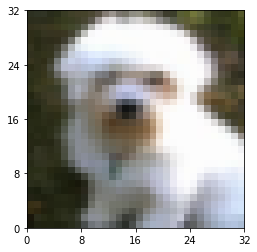

In [3]:
plot_one_image(data, labels, 300)

label: road


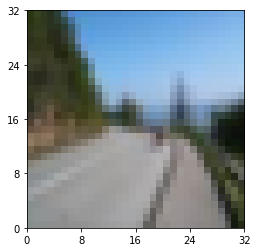

In [4]:
plot_one_image(data, labels, 947)

In [5]:
print(f'{len(data)}, Shape: {data.shape}')
print(Counter(labels))

1200, Shape: (1200, 3072)
Counter({'dog': 600, 'road': 600})


label: dog
label: dog
label: dog
label: dog
label: dog


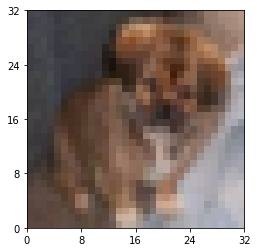

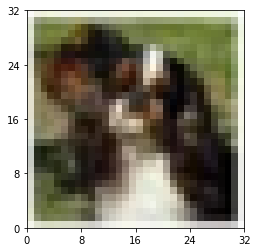

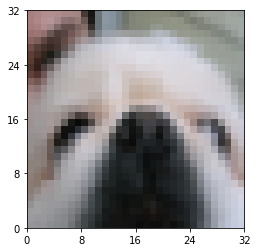

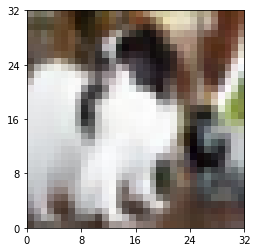

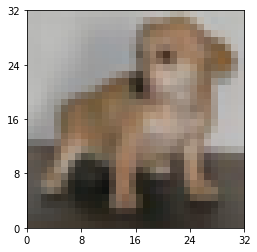

In [6]:
for i in [20, 40, 60, 80, 100]:
  plot_one_image(data, labels, i)

In [7]:
print('One image looks like: ')
print(data[0]) # accesses 1st image
print("Length of list: ", len(data[0]))
#RGB images are being fed in, so they're split up into 3 color channels and each split up image is 32 x 32 in dimensions
# since we have 3 color channels, we are storing a 3D matrix so the length of a list will be the dimension squared x # of elements per image
# 32^2 * 3 = 3072

One image looks like: 
[45 20 19 ... 83 99 31]
Length of list:  3072


In [8]:
print ('Data shape:', data.shape) # 1200 subarrays with length of 3072(3D array is 32 x 32)
print ('Data:', data) # 1200 images overall(represented by 1200 arrays inside the main array)

Data shape: (1200, 3072)
Data: [[ 45  20  19 ...  83  99  31]
 [101 114  35 ... 155 134  91]
 [213 221 221 ... 139  58  47]
 ...
 [126 174 202 ... 124 128 129]
 [191 232 240 ...  74  93  81]
 [237 248 254 ...  45  56  10]]


KNN Testing Set Accuracy:
79.167 %
label: dog
Predicted image: dog


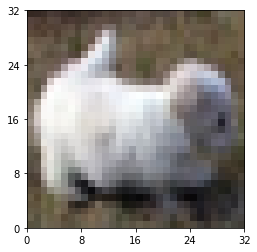

In [11]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, labels, test_size=0.2, random_state=1)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train) # always fit model on training data set

y_pred = knn.predict(X_test)

print("KNN Testing Set Accuracy:")
print(f'{round(accuracy_score(y_test, y_pred) * 100, 3)} %')

#using trained model and checking its predictions on various images
image_id = 138 #Change this!

# Visualize the image
plot_one_image(X_test, y_test, image_id)

# Use the model to predict what this might be and print it
print('Predicted image:', knn.predict([X_test[image_id]])[0])

New accuracy is: 89.17 %
label: dog
New prediction: dog


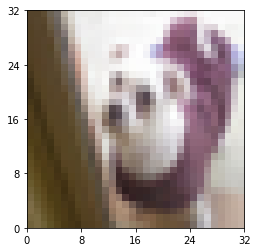

In [12]:
# building custom knn model

new_knn = KNeighborsClassifier(n_neighbors=2)

new_knn.fit(X_train, y_train)

new_y_pred = new_knn.predict(X_test)

new_accuracy = accuracy_score(y_test, new_y_pred)

print(f'New accuracy is: {round(new_accuracy * 100, 2)} %')


new_id = 239
plot_one_image(X_test, y_test, new_id)
print('New prediction:', new_knn.predict([X_test[new_id]])[0])

In [13]:
for k in [2,6,10,14,18,22,26,30]:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  new_y_pred = knn.predict(X_test)
  new_accuracy = accuracy_score(y_test, new_y_pred)
  print(f'With {k} neighbors, accuracy is: {round(new_accuracy * 100, 2)} %')

With 2 neighbors, accuracy is: 89.17 %
With 6 neighbors, accuracy is: 83.75 %
With 10 neighbors, accuracy is: 82.92 %
With 14 neighbors, accuracy is: 84.58 %
With 18 neighbors, accuracy is: 82.5 %
With 22 neighbors, accuracy is: 81.67 %
With 26 neighbors, accuracy is: 82.08 %
With 30 neighbors, accuracy is: 81.67 %


MLP Testing Accuracy:
86.67 %
label: dog
Prediction by neural network: dog


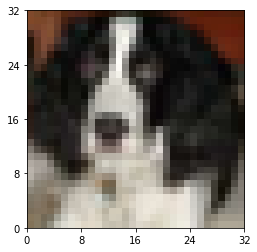

In [14]:
# loading in and training a simple NN

nnet = MLPClassifier(hidden_layer_sizes=(10, 5, 4), random_state=1, max_iter= 10000)
nnet.fit(X_train, y_train)

predictions = nnet.predict(X_test)

print("MLP Testing Accuracy:")
print(f'{round(accuracy_score(y_test, predictions)*100, 2)} %')
# if high accuracy, starts dropping because model is overfitting testing dataset

img_id = 137
plot_one_image(X_test, y_test, img_id)
print(f'Prediction by neural network: {nnet.predict([X_test[img_id]])[0]}')

85.83 %
label: dog
Predicted: dog


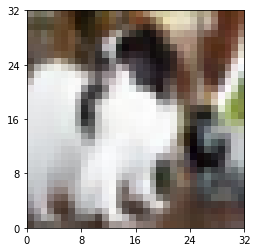

In [15]:
# building custom MLP NN

new_nnet = MLPClassifier(hidden_layer_sizes = (10, 10), random_state = 15, max_iter = 10000000)
# assigning it to specific value(assigning all weights to same value during each iteration)
#ensure model is not dependent on randomization of weights
new_nnet.fit(X_train, y_train)
nnet_pred = new_nnet.predict(X_test)
nnet_accuracy = accuracy_score(y_test, nnet_pred)
print(f'{round(nnet_accuracy * 100, 2)} %')
plot_one_image(X_test, y_test, 94)
print(f'Predicted: {new_nnet.predict([X_test[img_id]])[0]}')

In [16]:
# experimenting with various combinations of layers and number of neurons within each

for layers in [(160, 321), (2, 45), (3, 67), (110, 529)]: #ADD MORE HERE!

  print(f'Layer parameters are: {layers}')
  nnet = MLPClassifier(hidden_layer_sizes=layers, random_state=1, max_iter=10000) 

  nnet.fit(X_train, y_train)

  # Predict what the classes are based on the testing data
  predictions = nnet.predict(X_test)

  # Print the score on the testing data
  print(f"MLP Testing Accuracy: {round(accuracy_score(y_test, predictions)*100, 2)} %")

Layer parameters are: (160, 321)
MLP Testing Accuracy: 87.92 %
Layer parameters are: (2, 45)
MLP Testing Accuracy: 47.08 %
Layer parameters are: (3, 67)
MLP Testing Accuracy: 47.08 %
Layer parameters are: (110, 529)
MLP Testing Accuracy: 83.33 %


In [17]:
# creating and training a simple CNN

X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Create and train our CNN model
cnn = CNNClassifier()
cnn.fit(X_train, y_train)

# Predict what the classes are based on the testing data
predictions = cnn.predict(X_test)

# Print the score on the testing data
print("CNN Testing Accuracy:")
print(f'{round(accuracy_score(y_test, predictions)*100, 3)}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:93: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/30
96/96 - 13s - loss: 6.8559 - accuracy: 0.6542 - 13s/epoch - 136ms/step
Epoch 2/30
96/96 - 0s - loss: 1.1605 - accuracy: 0.8427 - 376ms/epoch - 4ms/step
Epoch 3/30
96/96 - 0s - loss: 0.6281 - accuracy: 0.8594 - 378ms/epoch - 4ms/step
Epoch 4/30
96/96 - 0s - loss: 0.4643 - accuracy: 0.8885 - 374ms/epoch - 4ms/step
Epoch 5/30
96/96 - 0s - loss: 0.2711 - accuracy: 0.9146 - 392ms/epoch - 4ms/step
Epoch 6/30
96/96 - 0s - loss: 0.2524 - accuracy: 0.9229 - 381ms/epoch - 4ms/step
Epoch 7/30
96/96 - 0s - loss: 0.2029 - accuracy: 0.9333 - 377ms/epoch - 4ms/step
Epoch 8/30
96/96 - 0s - loss: 0.2111 - accuracy: 0.9229 - 384ms/epoch - 4ms/step
Epoch 9/30
96/96 - 0s - loss: 0.1874 - accuracy: 0.9292 - 385ms/epoch - 4ms/step
Epoch 10/30
96/96 - 0s - loss: 0.1419 - accuracy: 0.9521 - 371ms/epoch - 4ms/step
Epoch 11/30
96/96 - 0s - loss: 0.1551 - accuracy: 0.9542 - 389ms/epoch - 4ms/step
Epoch 12/30
96/96 - 0s - loss: 0.1048 - accuracy: 0.9594 - 372ms/epoch - 4ms/step
Epoch 13/30
96/96 - 0s -

Epoch 1/50
96/96 - 3s - loss: 3.7538 - accuracy: 0.6958 - val_loss: 0.3218 - val_accuracy: 0.9042 - 3s/epoch - 26ms/step
Epoch 2/50
96/96 - 0s - loss: 1.0095 - accuracy: 0.8094 - val_loss: 0.1939 - val_accuracy: 0.9333 - 459ms/epoch - 5ms/step
Epoch 3/50
96/96 - 0s - loss: 0.4589 - accuracy: 0.8698 - val_loss: 0.3100 - val_accuracy: 0.8833 - 446ms/epoch - 5ms/step
Epoch 4/50
96/96 - 0s - loss: 0.4119 - accuracy: 0.8844 - val_loss: 0.1708 - val_accuracy: 0.9333 - 455ms/epoch - 5ms/step
Epoch 5/50
96/96 - 0s - loss: 0.2822 - accuracy: 0.9125 - val_loss: 0.2164 - val_accuracy: 0.9000 - 455ms/epoch - 5ms/step
Epoch 6/50
96/96 - 0s - loss: 0.2792 - accuracy: 0.9208 - val_loss: 0.1425 - val_accuracy: 0.9458 - 456ms/epoch - 5ms/step
Epoch 7/50
96/96 - 0s - loss: 0.2255 - accuracy: 0.9281 - val_loss: 0.1348 - val_accuracy: 0.9542 - 459ms/epoch - 5ms/step
Epoch 8/50
96/96 - 0s - loss: 0.1566 - accuracy: 0.9375 - val_loss: 0.1278 - val_accuracy: 0.9625 - 440ms/epoch - 5ms/step
Epoch 9/50
96/96 -

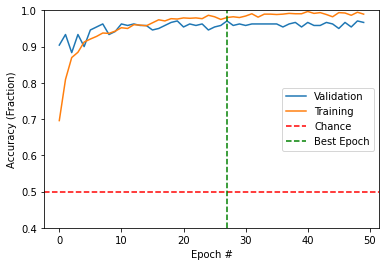

In [18]:
# plotting training and validation curves

history = cnn.fit(X_train, categorical_to_numpy(y_train), validation_data = (X_test, categorical_to_numpy(y_test)), epochs = 50)
plot_acc(history)